In [1]:
# !pip install --upgrade pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  pandas_datareader import data
import yfinance as yfin


In [3]:
#yf.pdr_override()
# !pip install yfinance --upgrade --no-cache-dir

In [4]:
start = '2005-01-01'
end = '2023-02-24'

yfin.pdr_override()

df = data.DataReader('AAPL' ,start,end)


[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59095900
2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.961916,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.971795,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.980306,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.981066,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.052499,2227450400


In [7]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.156786,1.162679,1.117857,1.130179,691992000
1,1.139107,1.169107,1.124464,1.141786,1096810400
2,1.151071,1.165179,1.143750,1.151786,680433600
3,1.154821,1.159107,1.130893,1.152679,705555200
4,1.160714,1.243393,1.156250,1.236607,2227450400


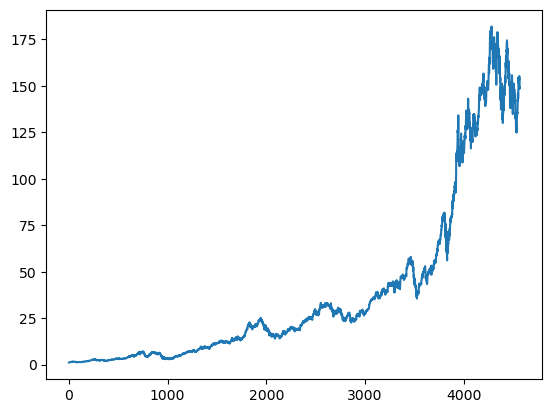

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,1.156786,1.162679,1.117857,1.130179,691992000
1,1.139107,1.169107,1.124464,1.141786,1096810400
2,1.151071,1.165179,1.143750,1.151786,680433600
3,1.154821,1.159107,1.130893,1.152679,705555200
4,1.160714,1.243393,1.156250,1.236607,2227450400
...,...,...,...,...,...
4562,153.509995,156.330002,153.350006,153.710007,68167900
4563,152.350006,153.000000,150.850006,152.550003,59095900
4564,150.199997,151.300003,148.410004,148.479996,58867200
4565,148.869995,149.949997,147.160004,148.910004,51011300


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4562    142.790499
4563    142.808299
4564    142.775499
4565    142.766199
4566    142.835399
Name: Close, Length: 4567, dtype: float64

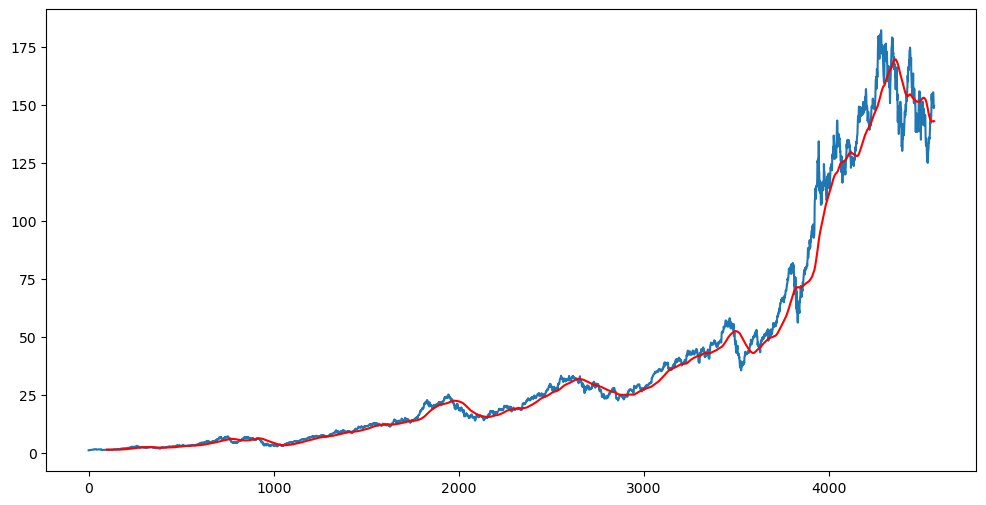

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4562    147.42840
4563    147.39375
4564    147.30605
4565    147.26675
4566    147.22735
Name: Close, Length: 4567, dtype: float64

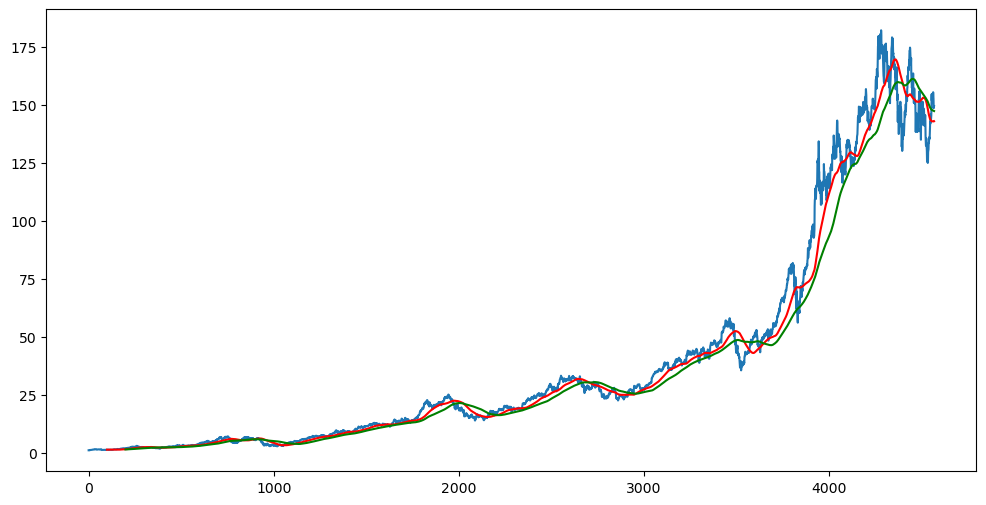

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [14]:
df.shape

(4567, 5)

In [15]:
# Splitting data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3196, 1)
(1371, 1)


In [16]:
data_training.head()

,Close
0,1.130179
1,1.141786
2,1.151786
3,1.152679
4,1.236607


In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [18]:
scalar

MinMaxScaler()

In [19]:
print(data_training)

          Close
0      1.130179
1      1.141786
2      1.151786
3      1.152679
4      1.236607
...         ...
3191  40.477501
3192  40.314999
3193  39.657501
3194  40.375000
3195  40.215000

[3196 rows x 1 columns]


In [20]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.00000000e+00],
       [2.91029488e-04],
       [5.41766909e-04],
       ...,
       [9.66025059e-01],
       [9.84015455e-01],
       [9.80003656e-01]])

In [21]:
data_training_array.shape

(3196, 1)

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    


In [23]:
x_train.shape

(3096, 100, 1)

In [24]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

2023-02-26 14:31:29.752380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [26]:
model = Sequential()

model.add(LSTM(units=50, activation ='relu', return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu', return_sequences = False))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer='adam',loss="mean_squared_error")
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
97/97 [==============================] - 42s 391ms/step - loss: 0.0223
Epoch 2/100
97/97 [==============================] - 34s 350ms/step - loss: 0.0059
Epoch 3/100
97/97 [==============================] - 31s 322ms/step - loss: 0.0059
Epoch 4/100
97/97 [==============================] - 29s 295ms/step - loss: 0.0041
Epoch 5/100
97/97 [==============================] - 27s 282ms/step - loss: 0.0042
Epoch 6/100
97/97 [==============================] - 48s 496ms/step - loss: 0.0041
Epoch 7/100
97/97 [==============================] - 34s 347ms/step - loss: 0.0035
Epoch 8/100
97/97 [==============================] - 26s 267ms/step - loss: 0.0038
Epoch 9/100
97/97 [==============================] - 27s 281ms/step - loss: 0.0033
Epoch 10/100
97/97 [==============================] - 31s 322ms/step - loss: 0.0034
Epoch 11/100
97/97 [==============================] - 33s 343ms/step - loss: 0.0028
Epoch 12/100
97/97 [==============================] - 30s 305ms/step - loss: 0.0030
E

In [29]:
model.save('keras_model.h5')

In [30]:
data_testing.head()

,Close
3196,39.912498
3197,39.570000
3198,39.970001
3199,39.667500
3200,39.682499


In [31]:
data_training.tail(100)

,Close
3096,35.567501
3097,35.910000
3098,36.132500
3099,35.919998
3100,35.947498
...,...
3191,40.477501
3192,40.314999
3193,39.657501
3194,40.375000


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = past_100_days.append(data_testing, ignore_index=True)


/tmp/ipykernel_2842/1416317959.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [34]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [35]:
input_data = scalar.fit_transform(final_df)
input_data

array([[1.36556857e-04],
       [2.47503117e-03],
       [3.99419038e-03],
       ...,
       [7.71067678e-01],
       [7.74003638e-01],
       [7.77349137e-01]])

In [36]:
input_data.shape

(1471, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])


In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1371, 100, 1)
(1371,)


In [39]:
# Prediction

y_predicted = model.predict(x_test)

43/43 [==============================] - 5s 118ms/step


In [40]:
y_predicted.shape

(1371, 1)

In [41]:
y_test

array([0.02980284, 0.02746436, 0.03019545, ..., 0.77106768, 0.77400364,
       0.77734914])

In [42]:
y_predicted

array([[0.05505893],
       [0.05531406],
       [0.05548421],
       ...,
       [0.6923152 ],
       [0.69593614],
       [0.69874954]], dtype=float32)

In [43]:
scalar.scale_

array([0.00682769])

In [44]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

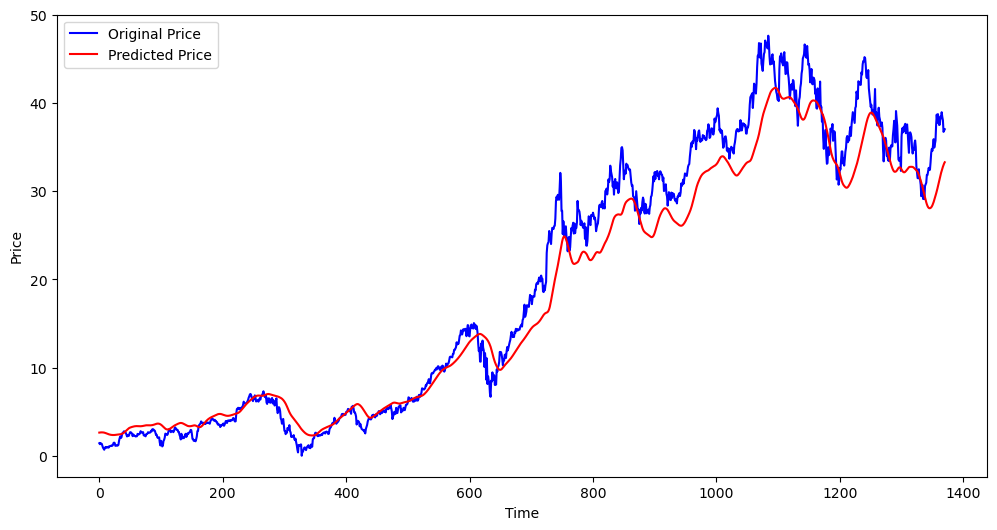

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()